In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

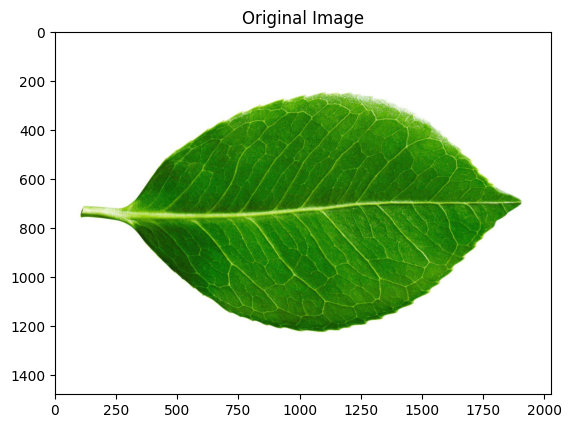

In [2]:
img0 = Image.open("leaf.jpeg")
img = np.array(img0)

h = img.shape[0]
w = img.shape[1]

img_rgb = []
for i in range(img.shape[2]):
    img_rgb.append(img[:,:,i])

plt.title("Original Image")
plt.imshow(img)
plt.show()

## Convert to Grayscale
Convert image to grayscale to analyse the histogram and decide the threshold

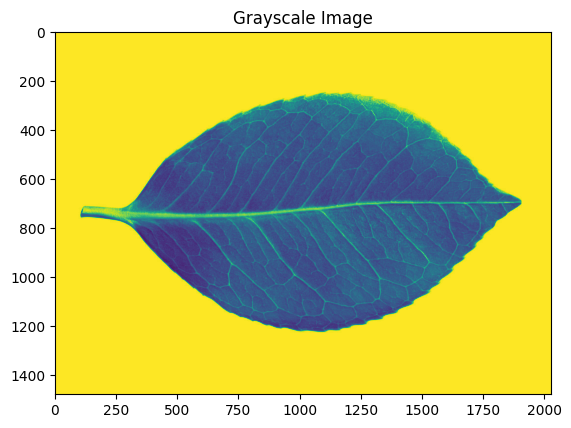

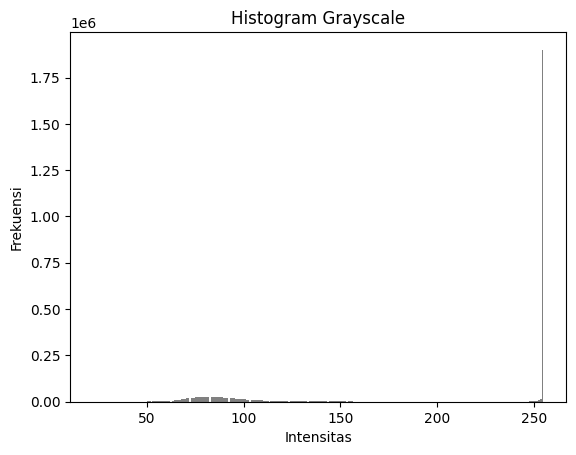

In [3]:
img_gray = img0.convert('L')
img_gray = np.array(img_gray)
plt.title("Grayscale Image")
plt.imshow(img_gray)
plt.show()

plt.hist(np.array(img_gray).flatten(), bins=256, color='gray')
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.show()

## Basic Thresholding Segmentation Method

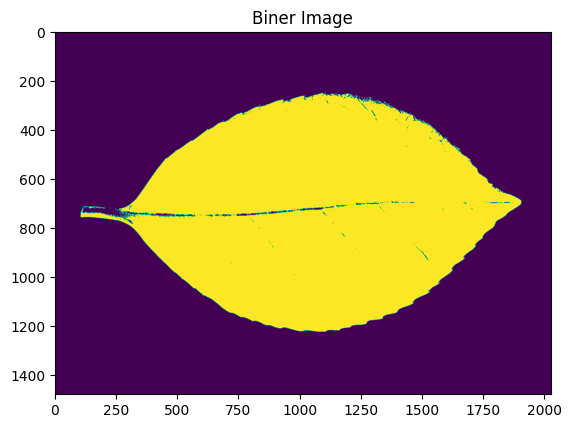

In [4]:
img_biner = np.zeros((h, w), dtype=int)
for i in range(h):
    for j in range(w):
        if (img_gray[i, j] < 200):
            img_biner[i, j] = 255
        else:
            img_biner[i, j] = 0

img_biner = img_biner/255
plt.title("Biner Image")
plt.imshow(img_biner)
plt.show()
            

## Morphology

In [ ]:
class Morphology():
    def __init__(self):
        pass

    def erosi_kernel(self):
        kernel = np.array([[0, 0, 0],
                           [0, 0, 0],
                           [0, 0, 0]])
        
        return kernel
    
    def dilasi_kernel(self):
        kernel = np.array([[0, 0, 0],
                           [0, 0, 0],
                           [0, 0, 0]])
        
        return kernel
    
    def erosi(self, binary_image):
        kernel = self.erosi_kernel()
        result = np.zeros((kernel.shape[0], kernel.shape[1]), dtype=int)
        for i in range(h-1):
            for j in range(w-1):
                local = binary_image[i:i+3, j:j+3]
                if (kernel == local).all():
                    print(True)

        return result
    
    def dilasi(self, binary_image):
        pass

In [17]:
morphology = Morphology()
result = morphology.erosi(img_biner)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

In [11]:
a = np.array([[0, 0],
              [1, 1]])

b = np.array([[0, 1],
              [1, 1]])

if (a == b).all():
    print(True)
else:
    print(False)

print(a.shape)
print((a == b).all())

False
(2, 2)
False
